<img align="right" style="padding-right:10px;" src="figures_wk1/answering_questions.png" width=350><br>
# Week 1 Lab: Data Analytics - Answering Questions

As noted in our lecture notebook this week, the main purpose of data analytics is to answer questions about a dataset. This week you will practice developing questions about a dataset and then answer those questions using python's Pandas library.

##  Our Dataset
**Dataset Name::** Movie Lens dataset
GroupLens Research has collected and made available rating data sets from the MovieLens web site (https://movielens.org).
The dataset is comprised of 3 seperate files: movies.dat, ratings.dat, users.dat.


Reminder: The first step in any type of data analysis is to <u>look</u> at your data.

In [ ]:
!head assign_wk1/movies.dat

1;Toy Story (1995);Animation|Children's|Comedy
2;Jumanji (1995);Adventure|Children's|Fantasy
3;Grumpier Old Men (1995);Comedy|Romance
4;Waiting to Exhale (1995);Comedy|Drama
5;Father of the Bride Part II (1995);Comedy
6;Heat (1995);Action|Crime|Thriller
7;Sabrina (1995);Comedy|Romance
8;Tom and Huck (1995);Adventure|Children's
9;Sudden Death (1995);Action
10;GoldenEye (1995);Action|Adventure|Thriller


In [ ]:
!head assign_wk1/ratings.dat

1;1193;5;978300760
1;661;3;978302109
1;914;3;978301968
1;3408;4;978300275
1;2355;5;978824291
1;1197;3;978302268
1;1287;5;978302039
1;2804;5;978300719
1;594;4;978302268
1;919;4;978301368


In [ ]:
!head assign_wk1/users.dat

1;F;1;10;48067
2;M;56;16;70072
3;M;25;15;55117
4;M;45;7;02460
5;M;25;20;55455
6;F;50;9;55117
7;M;35;1;06810
8;M;25;12;11413
9;M;25;17;61614
10;F;35;1;95370


Hmmm.... Well it appears that all 3 of our data files do not include a header row.  So we are going to need to define a header row for each of the 3 files. The accompanying README file denotes the fileds for each of these files.

<div class="alert alert-block alert-info">
    <b>File Separator::</b> Did you notice that seperator in the file is not a comma?  We will need to account for that when we load each file into a Pandas dataframe. <br> <br>
The README file has additional useful information that you might want to refer while working on this assignment.
</div>

In [ ]:
import pandas as pd

In [ ]:
# movie.dat fields --> MovieID::Title::Genres

m_cols = ['movie_id', 'title', 'genres']
movies_df = pd.read_csv('/content/movies.dat', sep=';', names=m_cols, encoding='latin1')
movies_df.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
# ratings.dat fields --> UserID::MovieID::Rating::Timestamp
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_df = pd.read_csv('/content/ratings.dat', sep=';', names=r_cols)
ratings_df.head(10)

,user_id,movie_id,rating,unix_timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [ ]:
# users.dat fields --> UserID::Gender::Age::Occupation::Zip-code
u_cols = ['user_id','sex', 'age', 'occupation', 'zip_code']
users_df = pd.read_csv('/content/users.dat', sep=';', names=u_cols)
users_df.head(10)

,user_id,sex,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


Now we can merge the individal dataframes into a single dataframe.

In [ ]:
# merge movies_df with ratings_df
movie_ratings_df = pd.merge(movies_df, ratings_df)

# now movies_ratings_df with users_df
lens_df = pd.merge(movie_ratings_df, users_df)
lens_df.head(20)

,movie_id,title,genres,user_id,rating,unix_timestamp,sex,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370
5,1,Toy Story (1995),Animation|Children's|Comedy,18,4,978154768,F,18,3,95825
6,1,Toy Story (1995),Animation|Children's|Comedy,19,5,978555994,M,1,10,48073
7,1,Toy Story (1995),Animation|Children's|Comedy,21,3,978139347,M,18,16,99353
8,1,Toy Story (1995),Animation|Children's|Comedy,23,4,978463614,M,35,0,90049
9,1,Toy Story (1995),Animation|Children's|Comedy,26,3,978130703,M,25,7,23112


In [ ]:
lens_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   movie_id        1000209 non-null  int64 
 1   title           1000209 non-null  object
 2   genres          1000209 non-null  object
 3   user_id         1000209 non-null  int64 
 4   rating          1000209 non-null  int64 
 5   unix_timestamp  1000209 non-null  int64 
 6   sex             1000209 non-null  object
 7   age             1000209 non-null  int64 
 8   occupation      1000209 non-null  int64 
 9   zip_code        1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [ ]:
lens_df.shape

(1000209, 10)

In [ ]:
lens_df.to_csv('movie_lens_merged.csv',index=False)

# Assignment Requirements
Here are the requirements for this week's assignment. Make sure you address all of the assignment steps in your submission.
1) Above, I demostrated using a `info()` and `shape` functions with our lens_df data structure.
    * Describe what both of these functions are used for?
    * What information is returned from these functions?
    * Why is this information helpful?
2) Using the functions demonstrated in `1_Data_Analytics_Pandas_Basics.ipynb` answer the following questions:
    * Which movie(s) has the highest average rating?
        * What about the movie(s) with the lowest rating?
    * Which movie(s) has the most ratings in our dataset?
    * List the 10 users who have rated the most movies?
3) Define 5 questions you would like to investigate within this dataset. As with step 2) above, use the functions demonstrated in `1_Data_Analytics_Pandas_Basics.ipynb` to answer your questions. Make sure you demonstrate the ffollowing functions through the analysis of your questions:
    * Data Visualization: histrgrams, boxplots
    * Descriptive functions: info(), describe(), shape
    * Dataframe reshaping: removal of rows or columns
    * Functions:
         * apply()
         * lambda()
         * aggregration (.agg)
         * groupby()
    * Conditional formatting in a dataframe

# Deliverables
Upload your Jupyter Notebook to the corresponding location in WorldClass.

**Note::** Make sure you have clearly indicated each assignment requirement within your notebook. Also, I <u><i><b>highly encourage</b></i></u> you to use markdown text to create a notebook that integrates your analysis within your code. Refer to the GettingStarted notebook to understand the difference between markdown text and comments.

In [2]:
import pandas as pd

In [3]:
lens_df=pd.read_csv('/content/movie_lens_merged.csv')

In [ ]:
lens_df.head(20)

,movie_id,title,genres,user_id,rating,unix_timestamp,sex,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370
5,1,Toy Story (1995),Animation|Children's|Comedy,18,4,978154768,F,18,3,95825
6,1,Toy Story (1995),Animation|Children's|Comedy,19,5,978555994,M,1,10,48073
7,1,Toy Story (1995),Animation|Children's|Comedy,21,3,978139347,M,18,16,99353
8,1,Toy Story (1995),Animation|Children's|Comedy,23,4,978463614,M,35,0,90049
9,1,Toy Story (1995),Animation|Children's|Comedy,26,3,978130703,M,25,7,23112


# Describe what both of these functions info and shape are used for? * What information is returned from these functions? * Why is this information helpful?

In [ ]:
lens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   movie_id        1000209 non-null  int64 
 1   title           1000209 non-null  object
 2   genres          1000209 non-null  object
 3   user_id         1000209 non-null  int64 
 4   rating          1000209 non-null  int64 
 5   unix_timestamp  1000209 non-null  int64 
 6   sex             1000209 non-null  object
 7   age             1000209 non-null  int64 
 8   occupation      1000209 non-null  int64 
 9   zip_code        1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [ ]:
lens_df.shape

(1000209, 10)

Info function provides summary of dataframe like column names,data types and non null values and memory usge.This helps in identifying missing values and in doing data cleaning and preprocessing steps

shape function provides the values of rows and columns which can de helpful in understanding the dataset dimension.

#  2) Using the functions demonstrated in 1_Data_Analytics_Pandas_Basics.ipynb answer the following questions: * Which movie(s) has the highest average rating? * What about the movie(s) with the lowest rating? * Which movie(s) has the most ratings in our dataset? * List the 10 users who have rated the most movies?

In [ ]:
avg_rating = lens_df.groupby('title')['rating'].mean()

In [ ]:
avg_rating

,rating
title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
...,...
"Zed & Two Noughts, A (1985)",3.413793
Zero Effect (1998),3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000


# Which movie(s) has the highest average rating?

In [ ]:
highest_avg_rat=avg_rating[avg_rating==avg_rating.nlargest(1)[0]]

<ipython-input-19-85faf1062fc5>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_avg_rat=avg_rating[avg_rating==avg_rating.nlargest(1)[0]]


In [ ]:
highest_avg_rat

,rating
title,
"Baby, The (1973)",5.0
Bittersweet Motel (2000),5.0
Follow the Bitch (1998),5.0
"Gate of Heavenly Peace, The (1995)",5.0
Lured (1947),5.0
One Little Indian (1973),5.0
Schlafes Bruder (Brother of Sleep) (1995),5.0
Smashing Time (1967),5.0
Song of Freedom (1936),5.0


some of the movies with highest average rating are Baby, The (1973),Bittersweet Motel (2000),Follow the Bitch (1998),Ulysses (Ulisse) (1954) and these are rated 5




# Which movie(s) has the lowest average rating?

In [ ]:
lowest_avg_rating=avg_rating[avg_rating==avg_rating.min()]

In [ ]:
lowest_avg_rating

,rating
title,
"Blood Spattered Bride, The (La Novia Ensangrentada) (1972)",1.0
"Bloody Child, The (1996)",1.0
Cheetah (1989),1.0
Diebinnen (1995),1.0
Elstree Calling (1930),1.0
Even Dwarfs Started Small (Auch Zwerge haben klein angefangen) (1971),1.0
"Fantastic Night, The (La Nuit Fantastique) (1949)",1.0
Get Over It (1996),1.0
Hillbillys in a Haunted House (1967),1.0


some of the Movies  with lowest average rating  are Blood Spattered Bride, The (La Novia Ensangrentada) (1972),Bloody Child, The (1996),Cheetah (1989),Diebinnen (1995),Elstree Calling (1930) and these are rated 1

# Which movie(s) has the most ratings in our dataset?

In [ ]:
lens_df.groupby('title').count().nlargest(10, columns = 'rating')['rating']

,rating
title,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672
Saving Private Ryan (1998),2653
Terminator 2: Judgment Day (1991),2649
"Matrix, The (1999)",2590
Back to the Future (1985),2583


The movie with most ratings is American Beauty (1999) with 3428 ratings followed by Star Wars: Episode IV - A New Hope (1977)	with 2991 ratings

# List the 10 users who have rated the most movies?

In [ ]:
top_raters = lens_df.groupby('user_id').size().sort_values(ascending=False).head(10)

In [ ]:
top_raters

,0
user_id,
4169,2314
1680,1850
4277,1743
1941,1595
1181,1521
889,1518
3618,1344
2063,1323
1150,1302


User 4169 rated 2314 movies followed by 1680 rated 1850 movies

# Define 5 questions you would like to investigate within this dataset. As with step 2) above, use the functions demonstrated in 1_Data_Analytics_Pandas_Basics.ipynb to answer your questions. Make sure you demonstrate the ffollowing functions through the analysis of your questions: * Data Visualization: histrgrams, boxplots * Descriptive functions: info(), describe(), shape * Dataframe reshaping: removal of rows or columns * Functions: * apply() * lambda() * aggregration (.agg) * groupby() * Conditional formatting in a dataframe

# top rated genere by age group

<ipython-input-30-abf53304926d>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_ratings = genre_age_group.sort_values(by="rating", ascending=False).groupby('age_bin').head(1)


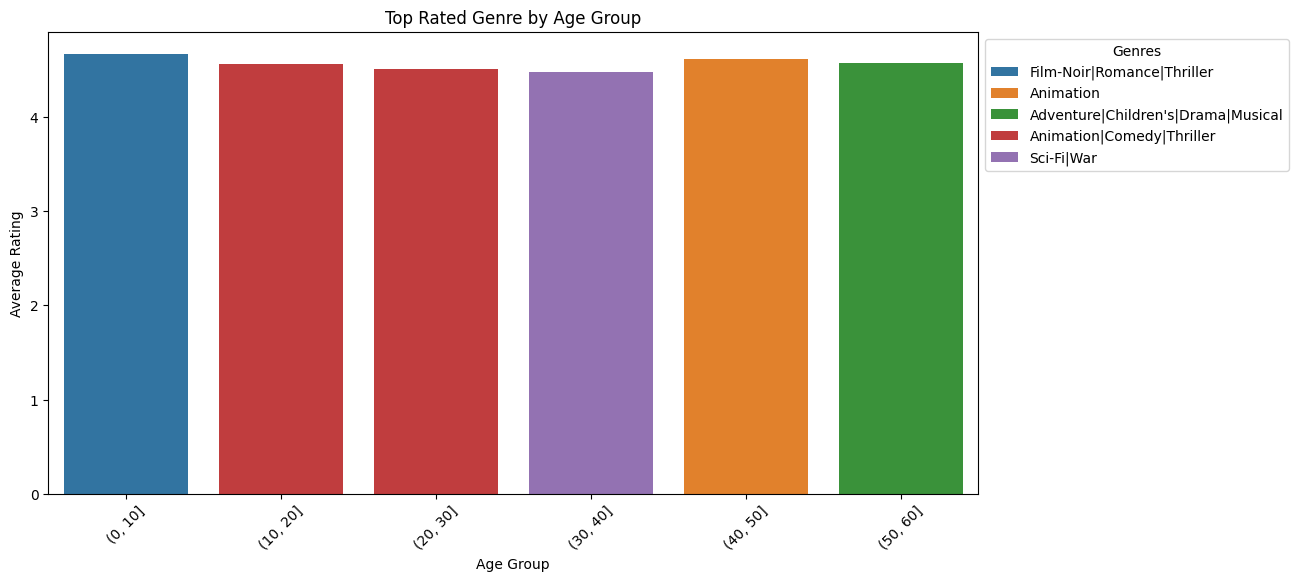

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
genre_age_group = lens_df.groupby(['age', 'genres'])['rating'].mean().reset_index()
genre_age_group['age_bin'] = pd.cut(genre_age_group['age'], bins=range(0, 70, 10))
top_ratings = genre_age_group.sort_values(by="rating", ascending=False).groupby('age_bin').head(1)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_ratings, x='age_bin', y='rating', hue='genres', dodge=False)
plt.xticks(rotation=45)
plt.title('Top Rated Genre by Age Group')
plt.ylabel('Average Rating')
plt.xlabel('Age Group')
plt.legend(title="Genres", bbox_to_anchor=(1, 1))
plt.show()

Based on age group 0-10 age group likes Film-Noir Romance Thriller genre,10-20 and 20-30  age group likes Animation Comedy Thriller and 30-40  age group likes Sci-Fi War and 40-50  age group likes Animation and 50-60  age group likes Adventure Children's | Drama |Musical





# Average rating based on genere and occupation

In [5]:
genre_occupation = lens_df.groupby(['occupation', 'genres'])['rating'].mean().reset_index()

In [8]:
genre_occupation.sort_values(by='rating',ascending=False)

,occupation,genres,rating
2280,8.0,Action|Adventure|Children's|Sci-Fi,5.0
5131,18.0,War,5.0
2388,8.0,Adventure|Thriller,5.0
1687,5.0,Musical,5.0
1685,5.0,Horror|Sci-Fi|Thriller,5.0
...,...,...,...
5386,19.0,Musical|War,1.0
926,3.0,Action|Crime|Mystery,1.0
773,2.0,Comedy|Horror|Sci-Fi,1.0
2020,7.0,Action|Children's,1.0


In [10]:
genre_occupation.groupby(['occupation'])['rating'].max()

,rating
occupation,
0.0,4.666667
1.0,4.700000
2.0,5.000000
3.0,5.000000
4.0,5.000000
5.0,5.000000
6.0,5.000000
7.0,5.000000
8.0,5.000000


Occupation 0 gave the max average rating of 4.6 based on different generes followed by occupation 1 gave 4.7 average rating and all others gave 5 average rating.

# Top 3 generes by age

In [ ]:
genre_age_group = lens_df.groupby(['age', 'genres'])['rating'].mean().reset_index()
top_genres_by_age = genre_age_group.groupby('age').apply(lambda x: x.nlargest(3, 'rating'))

<ipython-input-24-28f8d9902905>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genres_by_age = genre_age_group.groupby('age').apply(lambda x: x.nlargest(3, 'rating'))


In [ ]:
top_genres_by_age

age                              genres    rating
age                                                        
1   262     1          Film-Noir|Romance|Thriller  4.666667
    2       1          Action|Adventure|Animation  4.636364
    223     1             Crime|Film-Noir|Mystery  4.625000
18  447    18           Animation|Comedy|Thriller  4.562500
    586    18                          Sci-Fi|War  4.471795
    313    18   Action|Adventure|Drama|Sci-Fi|War  4.442142
25  745    25           Animation|Comedy|Thriller  4.506711
    733    25                           Animation  4.428571
    885    25                          Sci-Fi|War  4.407950
35  1185   35                          Sci-Fi|War  4.474227
    1002   35  Adventure|Children's|Drama|Musical  4.446384
    1044   35           Animation|Comedy|Thriller  4.364238
45  1344   45           Animation|Comedy|Thriller  4.500000
    1332   45                           Animation  4.485714
    1484   45                          Sci-Fi|War  4.436242
50  1631   50                           Animation  4.611111
    1740   50                Drama|Romance|Sci-Fi  4.600000
    1643   50           Animation|Comedy|Thriller  4.545455
56  1897   56  Adventure|Children's|Drama|Musical  4.573171
    1817   56        Action|Adventure|Romance|War  4.572917
    2031   56                Drama|Romance|Sci-Fi  4.500000

For age 1 the top 3 generes are Film-Noir|Romance|Thriller with	4.666667 average rating and Action|Adventure|Animation	with 4.636364 average rating
and Crime|Film-Noir|Mystery with 	4.625000 average rating

# average ratings and rating counts based on zipcode

In [ ]:
zip_code_ratings = lens_df.groupby('zip_code').agg(rating_count=('rating', 'count'), avg_rating=('rating', 'mean'))

In [ ]:
zip_code_ratings.sort_values(by='rating_count',ascending=False)

,rating_count,avg_rating
zip_code,,
94110,3802,3.615203
60640,3430,3.423615
98103,3204,3.652310
95616,3079,3.869438
02138,3019,3.472011
...,...,...
48146,20,3.550000
81291,20,3.300000
53222,20,4.200000


zipcode 94110 has most rting counts of 3802 followed by 60640 zipcode with 3430 rating

In [ ]:
zip_code_ratings.sort_values(by='avg_rating',ascending=False)

,rating_count,avg_rating
zip_code,,
46239,165,4.890909
12570,103,4.796117
93060,25,4.760000
95062,25,4.760000
30349,196,4.734694
...,...,...
85054,170,2.088235
21555,230,2.060870
46140,55,1.927273


Most average rating is given by 46239 with 4.89 followed by 12570 with 4.79

# rating variation based on time

In [24]:
lens_df['timestamp'] = pd.to_datetime(lens_df['unix_timestamp'], unit='s')
lens_df['hour'] = lens_df['timestamp'].dt.hour
lens_df['day_of_week'] = lens_df['timestamp'].dt.dayofweek
lens_df['month'] = lens_df['timestamp'].dt.month

temporal_patterns = lens_df.groupby(['hour', 'day_of_week', 'month']).agg({
    'rating': ['mean', 'count', 'std']
}).round(2)



In [25]:
temporal_patterns

rating            
                         mean count   std
hour day_of_week month                   
0.0  0.0         1.0     3.50    12  0.67
                 2.0     3.00     5  0.71
                 3.0     3.33     3  2.08
                 4.0     3.56    16  0.89
                 5.0     2.62     8  1.41
...                       ...   ...   ...
23.0 6.0         7.0     3.00     1   NaN
                 8.0     3.71     7  0.49
                 9.0     3.42    12  0.67
                 11.0    3.41  2244  1.20
                 12.0    3.44   296  1.03

[1745 rows x 3 columns]

Here i checked the mean rating,count and standard deviation based on hour day and month .We can get the user watching count based on this. for 12 am of sunday of january month the mean rating is 3.5 and count is 12.

# colours  based on average rating

In [ ]:
avg_ratings = lens_df.groupby('title')['rating'].mean().reset_index()

def categorize_rating(rating):
    if rating >= 4:
        return 'high'
    elif rating <= 2:
        return 'low'
    else:
        return 'average'
avg_ratings['category'] = avg_ratings['rating'].apply(categorize_rating)

color_map = {
    'high': 'green',
    'average': 'yellow',
    'low': 'red'
}
avg_ratings['color'] = avg_ratings['category'].map(color_map)
def color_ratings(row):
    return ['background-color: {}'.format(row['color']) if col == 'rating' else '' for col in row.index]


avg_ratings_styled = (avg_ratings.style.apply(color_ratings, axis=1)
)
avg_ratings_styled

,title,rating,category,color
0,"$1,000,000 Duck (1971)",3.027027,average,yellow
1,'Night Mother (1986),3.371429,average,yellow
2,'Til There Was You (1997),2.692308,average,yellow
3,"'burbs, The (1989)",2.910891,average,yellow
4,...And Justice for All (1979),3.713568,average,yellow
5,1-900 (1994),2.500000,average,yellow
6,10 Things I Hate About You (1999),3.422857,average,yellow
7,101 Dalmatians (1961),3.596460,average,yellow
8,101 Dalmatians (1996),3.046703,average,yellow
9,12 Angry Men (1957),4.295455,high,green


Here i gave colour Based on the movie average rating for rating grater than 4 i gave green and considered it as high and for rating less than two it is considered  low with red colour and others are with average rating and considered yellow

# average rating based on generes and sex

In [11]:
gender_genre_ratings = lens_df.groupby(['genres', 'sex'])['rating'].mean().unstack()

In [12]:
gender_genre_ratings

sex,F,M
genres,,
Action,3.192802,3.267113
Action|Adventure,3.617225,3.605969
Action|Adventure|Animation,3.875000,4.254237
Action|Adventure|Animation|Children's|Fantasy,2.882353,2.513514
Action|Adventure|Animation|Horror|Sci-Fi,3.200000,3.411765
...,...,...
Sci-Fi|Thriller|War,3.500000,3.638298
Sci-Fi|War,4.367347,4.475771
Thriller,3.316571,3.478790


Here i took average rating based on generes and sex and for example for war females gave 3.9 average rating where as males gave 3.84 average rating

# most popular generes based on zipcode

In [28]:
genre_popularity = lens_df.groupby(['zip_code', 'genres']).size().reset_index(name='num_ratings')
most_popular_genres = genre_popularity.loc[genre_popularity.groupby('zip_code')['num_ratings'].idxmax()]
most_popular_genres

,zip_code,genres,num_ratings
36,00961,Drama,32
67,01002,Comedy,17
215,01003,Comedy,167
293,01060,Comedy,7
344,01267,Animation|Children's,15
...,...,...,...
69275,99352,Comedy,41
69323,99353,Animation|Children's,5
69340,99508,Comedy,8
69362,99709,Comedy,36


Here i did the popularity of movies based on zipcode for example in 00961 drama is popular with 32 ratings

# summary

**info function**-Info function provides summary of dataframe like column names,data types and non null values and memory usge.This helps in identifying missing values and in doing data cleaning and preprocessing steps

**shape function**-shape function provides the values of rows and columns which can de helpful in understanding the dataset dimension.

**Which movie(s) has the highest average rating?**

some of the movies with highest average rating are Baby, The (1973),Bittersweet Motel (2000),Follow the Bitch (1998),Ulysses (Ulisse) (1954) and these are rated 5


**Which movie(s) has the lowest average rating?**

some of the Movies with lowest average rating are Blood Spattered Bride, The (La Novia Ensangrentada) (1972),Bloody Child, The (1996),Cheetah (1989),Diebinnen (1995),Elstree Calling (1930) and these are rated 1


**Which movie(s) has the most ratings in our dataset?**


The movie with most ratings is American Beauty (1999) with 3428 ratings followed by Star Wars: Episode IV - A New Hope (1977) with 2991 ratings


**List the 10 users who have rated the most movies?**

User 4169 rated 2314 movies followed by 1680 rated 1850 movies

**Define at least 5 analytical questions you would like to investigate for this dataset.**

**top rated genere by age group**


Based on age group 0-10 age group likes Film-Noir Romance Thriller genre,10-20 and 20-30 age group likes Animation Comedy Thriller and 30-40 age group likes Sci-Fi War and 40-50 age group likes Animation and 50-60 age group likes Adventure Children's | Drama |Musical


**Average rating based on genere and occupation**


Occupation 0 gave the max average rating of 4.6 based on different generes followed by occupation 1 gave 4.7 average rating and all others gave 5 average rating.


**Top 3 generes by age**

For age 1 the top 3 generes are Film-Noir|Romance|Thriller with 4.666667 average rating and Action|Adventure|Animation with 4.636364 average rating and Crime|Film-Noir|Mystery with 4.625000 average rating


**average ratings and rating counts based on zipcode**

zipcode 94110 has most rting counts of 3802 followed by 60640 zipcode with 3430 rating


Most average rating is given by 46239 with 4.89 followed by 12570 with 4.79


**rating variation based on time**


Here i checked the mean rating,count and standard deviation based on hour day and month .We can get the user watching count based on this. for 12 am of sunday of january month the mean rating is 3.5 and count is 12.


**colours based on average rating**

Here i gave colour Based on the movie average rating for rating grater than 4 i gave green and considered it as high and for rating less than two it is considered low with red colour and others are with average rating and considered yellow


**average rating based on generes and sex**

Here i took average rating based on generes and sex and for example for war females gave 3.9 average rating where as males gave 3.84 average rating


**most popular generes based on zipcode**

Here i did the popularity of movies based on zipcode for example in 00961 drama is popular with 32 ratings




